This script plot the difference between CTRL and CUX1 KD ATAC seq signal in human CD34+ HSPC for the CUX1-promotor bound loops and non-interacting loops. The loops are identified from CD34 HiC in Zhang 2020

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [17]:
os.chdir("../../data/analysis_2_results")

import the count matrix from computeMatrix

In [19]:
interact = pd.read_csv("outMatrix_CD34_q30_srt_interact_fixed.tab",header = 0,sep = "\t")
non_interact = pd.read_csv("outMatrix_CD34_q30_srt_no_interact_fixed.tab",header = 0,sep = "\t")
#interact = pd.read_csv("CD34_ATAC_CUX1_interacting_loops_Heatmap_values.txt",header = 0,sep = "\t")
#non_interact = pd.read_csv("CD34_ATAC_non_CUX1_interacting_loops_Heatmap_values.txt",header = 0,sep = "\t")

ParserError: Error tokenizing data. C error: Expected 6 fields in line 3, saw 81


In [5]:
interact

,bamCompare CD34 ATAC KD RPKM,bamCompare CD34 ATAC KD RPKM.1,bamCompare CD34 ATAC KD RPKM.2,bamCompare CD34 ATAC KD RPKM.3,bamCompare CD34 ATAC KD RPKM.4,bamCompare CD34 ATAC KD RPKM.5,bamCompare CD34 ATAC KD RPKM.6,bamCompare CD34 ATAC KD RPKM.7,bamCompare CD34 ATAC KD RPKM.8,bamCompare CD34 ATAC KD RPKM.9,...,bamCompare CD34 ATAC WT RPKM.190,bamCompare CD34 ATAC WT RPKM.191,bamCompare CD34 ATAC WT RPKM.192,bamCompare CD34 ATAC WT RPKM.193,bamCompare CD34 ATAC WT RPKM.194,bamCompare CD34 ATAC WT RPKM.195,bamCompare CD34 ATAC WT RPKM.196,bamCompare CD34 ATAC WT RPKM.197,bamCompare CD34 ATAC WT RPKM.198,bamCompare CD34 ATAC WT RPKM.199
0,0.5904,0.3936,0.1968,0.1855,0.3711,0.4638,0.5566,0.5566,0.6494,0.3711,...,0.4547,0.9093,1.0810,0.9093,0.7380,0.8501,0.5667,0.2834,0.1713,0.3426
1,0.3936,0.5904,0.3936,0.3823,0.3711,0.3711,0.1855,0.0000,0.0000,0.0000,...,1.4230,0.7708,0.7708,0.8565,1.1130,1.2850,1.2850,1.4560,1.6270,2.3920
2,0.1968,0.0000,0.1855,0.3711,0.3711,0.1855,0.0000,0.0000,0.0000,0.0000,...,3.4790,4.0450,5.1520,5.6630,7.2540,12.5400,20.1300,25.7400,27.6300,31.9900
3,0.0000,0.1855,0.7534,1.7150,3.2670,4.9280,6.5790,10.9200,18.0100,24.6100,...,1.0810,1.3380,0.8829,0.4282,0.5139,0.7708,1.0280,0.8565,1.1400,1.4230
4,0.3711,0.5679,0.5792,0.5904,0.3936,0.1968,0.0000,0.1968,0.5904,0.9840,...,0.2834,0.0000,0.0000,0.3426,0.6852,0.8565,0.7972,0.4547,0.2834,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.7647,0.9615,0.8631,0.7647,0.7647,0.5792,0.6776,0.7647,0.9502,0.7534,...,0.3426,0.5139,0.5139,0.7972,1.2520,1.2520,0.9685,0.3426,0.1713,0.4547
268,0.4864,0.2839,0.1855,0.2783,0.5679,0.9502,1.7370,2.3170,3.2560,2.6540,...,2.0820,0.9421,0.3426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
269,1.1360,1.2400,1.1580,1.2790,1.7490,2.5020,2.9720,2.9830,2.5250,2.3500,...,0.3426,0.1713,0.1713,0.5139,0.8565,1.3110,1.9900,2.5570,2.1020,1.8190
270,0.9277,1.1250,1.3210,1.5180,1.3330,1.1580,1.3660,1.5630,1.6390,1.3330,...,1.5940,1.8510,1.7390,1.5420,1.4820,1.1660,0.9093,0.7116,1.2520,1.3640


In [6]:
non_interact

,bamCompare CD34 ATAC KD RPKM,bamCompare CD34 ATAC KD RPKM.1,bamCompare CD34 ATAC KD RPKM.2,bamCompare CD34 ATAC KD RPKM.3,bamCompare CD34 ATAC KD RPKM.4,bamCompare CD34 ATAC KD RPKM.5,bamCompare CD34 ATAC KD RPKM.6,bamCompare CD34 ATAC KD RPKM.7,bamCompare CD34 ATAC KD RPKM.8,bamCompare CD34 ATAC KD RPKM.9,...,bamCompare CD34 ATAC WT RPKM.190,bamCompare CD34 ATAC WT RPKM.191,bamCompare CD34 ATAC WT RPKM.192,bamCompare CD34 ATAC WT RPKM.193,bamCompare CD34 ATAC WT RPKM.194,bamCompare CD34 ATAC WT RPKM.195,bamCompare CD34 ATAC WT RPKM.196,bamCompare CD34 ATAC WT RPKM.197,bamCompare CD34 ATAC WT RPKM.198,bamCompare CD34 ATAC WT RPKM.199
0,0.5904,0.5904,0.5904,0.7872,1.1700,1.3660,0.9728,0.3936,0.0000,0.0000,...,20.2000,15.07000,10.9100,9.0930,7.3930,5.1200,3.9830,3.47200,3.6760,3.5350
1,1.6920,1.8890,1.6330,1.0710,1.2680,1.1580,1.1470,1.4030,1.3040,1.4140,...,0.1713,0.08565,0.1713,0.5139,1.0280,1.1990,1.0280,0.51390,0.1713,0.1713
2,2.1540,1.8470,1.7370,1.8360,2.9940,3.8570,4.0320,3.6270,3.7900,3.8880,...,0.6852,0.77080,0.6852,0.9950,1.0210,1.1330,0.9357,0.82370,0.7116,0.5139
3,0.0000,0.1968,0.5904,1.2790,1.7600,2.0330,1.5290,1.0490,0.7760,0.9840,...,1.4170,0.56670,0.0000,0.1713,0.3426,0.6852,0.6852,0.51390,0.1713,0.0000
4,0.5679,0.1855,0.1855,0.0000,0.0000,0.0000,0.0000,0.0000,0.1968,0.3936,...,0.0000,0.00000,0.0000,0.0000,0.0000,0.0000,0.1713,0.34260,0.5139,0.3426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,1.3330,0.8575,0.6663,0.6776,0.6888,0.8856,1.0710,1.4540,1.7490,1.6620,...,0.0000,0.17130,0.3426,0.7972,1.0810,1.3640,1.3640,0.90930,0.4547,0.0000
4531,0.1968,0.3936,0.5904,0.3936,0.5904,0.7872,1.3780,1.1810,1.1810,0.7872,...,0.0000,0.00000,0.2834,0.7380,0.9950,0.9685,0.6852,0.51390,0.3426,0.1713
4532,0.3711,0.3711,0.1855,0.0000,0.1968,0.3936,0.5904,0.5792,0.7647,0.7647,...,1.1330,1.41700,1.4170,1.0210,0.6259,0.6852,1.0540,1.33800,1.4500,1.6210
4533,7.1380,7.2360,6.8820,5.1140,3.5900,2.1370,1.7430,1.8470,1.9460,1.6500,...,0.6259,0.73800,0.9093,0.9685,1.3110,1.2520,0.9950,0.62590,0.5139,1.1400


aggregate the RPKM values for all the bins(columns) for each region

In [7]:
interact_CTRL = interact.filter(regex = "CTRL").sum(axis = 1)
interact_KD = interact.filter(regex = "KD").sum(axis = 1)
interact_plot = pd.DataFrame({'CTRL':interact_CTRL,'KD':interact_KD})

In [8]:
non_interact_CTRL = non_interact.filter(regex = "CTRL").sum(axis = 1)
non_interact_KD = non_interact.filter(regex = "KD").sum(axis = 1)
non_interact_plot = pd.DataFrame({'CTRL':non_interact_CTRL,'KD':non_interact_KD})
#randomly sample 272 rows to size match with the interacting loops. This is because the variance of the interact loops are drastically higher than the non-interaction loops. t test has to assume euaal variance
non_interact_plot_sample = non_interact_plot.sample(n = 272)

Perform statistical test

In [9]:
scipy.stats.ttest_ind(non_interact_plot_sample['CTRL'],non_interact_plot_sample['KD'])

Ttest_indResult(statistic=0.8507440832476909, pvalue=0.3952872082650377)

In [10]:
scipy.stats.ttest_ind(interact_plot['CTRL'],interact_plot['KD'])

Ttest_indResult(statistic=2.276029276439668, pvalue=0.023233530546983894)

Plot

In [11]:
#join the two data frame together for plotting
interact_plot['sample']="interact"
non_interact_plot_sample['sample']="non_interact"

In [12]:
interact_plot = pd.melt(interact_plot,id_vars='sample',var_name="condition",value_name="RPKM")
non_interact_plot_sample = pd.melt(non_interact_plot_sample,id_vars='sample',var_name="condition",value_name="RPKM")

In [13]:
final_plot=non_interact_plot_sample.append(interact_plot)
final_plot['log2_RPKM'] = np.log2(final_plot['RPKM'])

/Users/alexandregaubil/opt/anaconda3/envs/bioinformatics/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


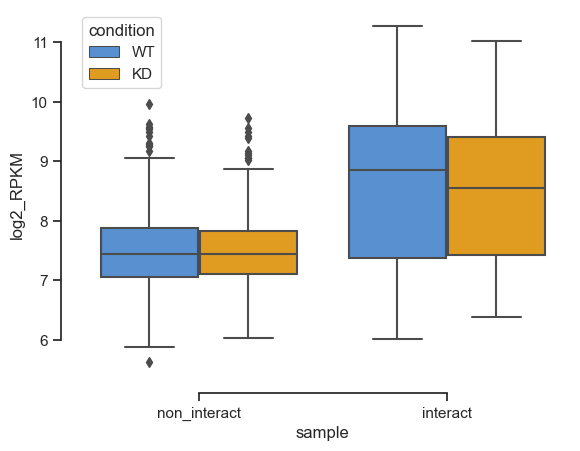

In [14]:
sns.set_theme(style="ticks")
my_pal = {"CTRL":"#448ee4","KD": "orange"}
sns.boxplot(x="sample", y="log2_RPKM",
            hue="condition",palette=my_pal,
            data=final_plot)
sns.despine(offset=10, trim=True)